##**Creating Cohorts of Songs**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import sklearn.metrics
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('/content/rolling_stones_spotify.csv')

In [3]:
df.head()

name               album release_date  track_number  \
0   Concert Intro Music - Live  Licked Live In NYC   10-06-2022             1   
1   Street Fighting Man - Live  Licked Live In NYC   10-06-2022             2   
2           Start Me Up - Live  Licked Live In NYC   10-06-2022             3   
3  If You Can't Rock Me - Live  Licked Live In NYC   10-06-2022             4   
4            Don’t Stop - Live  Licked Live In NYC   10-06-2022             5   

                       id                                   uri  acousticness  \
0  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824   
1  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU        0.4370   
2  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW        0.4160   
3  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH        0.5670   
4  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw        0.4000   

   danceability  energy  instrumentalness  liveness  loudness  speechiness  \
0         0.463   0.993          0.996000     0.932   -12.913       0.1100   
1         0.326   0.965          0.233000     0.961    -4.803       0.0759   
2         0.386   0.969          0.400000     0.956    -4.936       0.1150   
3         0.369   0.985          0.000107     0.895    -5.535       0.1930   
4         0.303   0.969          0.055900     0.966    -5.098       0.0930   

     tempo  valence  popularity  duration_ms  
0  118.001   0.0302          33        48640  
1  131.455   0.3180          34       253173  
2  130.066   0.3130          34       263160  
3  132.994   0.1470          32       305880  
4  130.533   0.2060          32       305106

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null   int64  


In [5]:
df['release_date']=pd.to_datetime(df['release_date'],format='%d-%m-%Y')

In [6]:
df.size

27370

In [7]:
df.shape

(1610, 17)

In [8]:
df.duplicated().value_counts()

False    1610
Name: count, dtype: int64

In [9]:
df['album'].value_counts()

album
Voodoo Lounge Uncut (Live)                                   56
Honk (Deluxe)                                                47
Live Licks                                                   46
Tattoo You (Super Deluxe)                                    46
Some Girls (Deluxe Version)                                  44
                                                             ..
Beggars Banquet (50th Anniversary Edition)                   10
Let It Bleed (50th Anniversary Edition / Remastered 2019)     9
Black And Blue                                                8
Black And Blue (Remastered 2009)                              8
Jamming With Edward                                           6
Name: count, Length: 90, dtype: int64

In [10]:
df1 = df.copy()

In [11]:
df1.drop(['name','album','release_date','track_number','id',],axis=1,inplace=True)

In [12]:
df1.head()

uri  acousticness  danceability  energy  \
0  spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824         0.463   0.993   
1  spotify:track:6GVgVJBKkGJoRfarYRvGTU        0.4370         0.326   0.965   
2  spotify:track:1Lu761pZ0dBTGpzxaQoZNW        0.4160         0.386   0.969   
3  spotify:track:1agTQzOTUnGNggyckEqiDH        0.5670         0.369   0.985   
4  spotify:track:7piGJR8YndQBQWVXv6KtQw        0.4000         0.303   0.969   

   instrumentalness  liveness  loudness  speechiness    tempo  valence  \
0          0.996000     0.932   -12.913       0.1100  118.001   0.0302   
1          0.233000     0.961    -4.803       0.0759  131.455   0.3180   
2          0.400000     0.956    -4.936       0.1150  130.066   0.3130   
3          0.000107     0.895    -5.535       0.1930  132.994   0.1470   
4          0.055900     0.966    -5.098       0.0930  130.533   0.2060   

   popularity  duration_ms  
0          33        48640  
1          34       253173  
2          34       263160  
3          32       305880  
4          32       305106

In [13]:
df1.drop(['uri'],axis=1,inplace=True)

In [14]:
df1.describe()

acousticness  danceability       energy  instrumentalness    liveness  \
count   1610.000000   1610.000000  1610.000000       1610.000000  1610.00000   
mean       0.250475      0.468860     0.792352          0.164170     0.49173   
std        0.227397      0.141775     0.179886          0.276249     0.34910   
min        0.000009      0.104000     0.141000          0.000000     0.02190   
25%        0.058350      0.362250     0.674000          0.000219     0.15300   
50%        0.183000      0.458000     0.848500          0.013750     0.37950   
75%        0.403750      0.578000     0.945000          0.179000     0.89375   
max        0.994000      0.887000     0.999000          0.996000     0.99800   

          loudness  speechiness        tempo      valence   popularity  \
count  1610.000000  1610.000000  1610.000000  1610.000000  1610.000000   
mean     -6.971615     0.069512   126.082033     0.582165    20.788199   
std       2.994003     0.051631    29.233483     0.231253    12.426859   
min     -24.408000     0.023200    46.525000     0.000000     0.000000   
25%      -8.982500     0.036500   107.390750     0.404250    13.000000   
50%      -6.523000     0.051200   124.404500     0.583000    20.000000   
75%      -4.608750     0.086600   142.355750     0.778000    27.000000   
max      -1.014000     0.624000   216.304000     0.974000    80.000000   

         duration_ms  
count    1610.000000  
mean   257736.488199  
std    108333.474920  
min     21000.000000  
25%    190613.000000  
50%    243093.000000  
75%    295319.750000  
max    981866.000000

In [15]:
pd.DataFrame(df.groupby([df['album'],df['name']])['popularity'].value_counts()).sort_values(by='popularity',ascending=False).head(20)

count
album                                      name                                              popularity       
Aftermath                                  Paint It, Black                                   80              1
Let It Bleed                               Gimme Shelter                                     76              1
Out Of Our Heads                           (I Can't Get No) Satisfaction - Mono Version      76              1
Tattoo You (2009 Re-Mastered)              Start Me Up - Remastered 2009                     76              1
Beggars Banquet (50th Anniversary Edition) Sympathy For The Devil - 50th Anniversary Edition 73              1
Some Girls                                 Beast Of Burden - Remastered 1994                 72              1
Goats Head Soup (Remastered 2009)          Angie                                             71              1
Sticky Fingers (Remastered)                Wild Horses - 2009 Mix                            69              1
Some Girls                                 Miss You - Remastered                             69              1
Let It Bleed                               You Can't Always Get What You Want                67              1
Sticky Fingers (Remastered)                Brown Sugar - 2009 Remaster                       66              1
Aftermath                                  Under My Thumb                                    64              1
Exile On Main Street (2010 Re-Mastered)    Tumbling Dice                                     63              1
Sticky Fingers (Remastered)                Can't You Hear Me Knocking - 2009 Mix             63              1
Between The Buttons                        Ruby Tuesday                                      63              1
Bridges To Babylon (Remastered)            Anybody Seen My Baby? - Remastered                61              1
Tattoo You (2009 Re-Mastered)              Waiting On A Friend - Remastered 2009             59              1
Sticky Fingers (Remastered)                Dead Flowers - 2009 Mix                           58              1
Beggars Banquet (50th Anniversary Edition) Street Fighting Man - 50th Anniversary Edition    56              1
Out Of Our Heads                           Play With Fire - Mono Version                     56              1

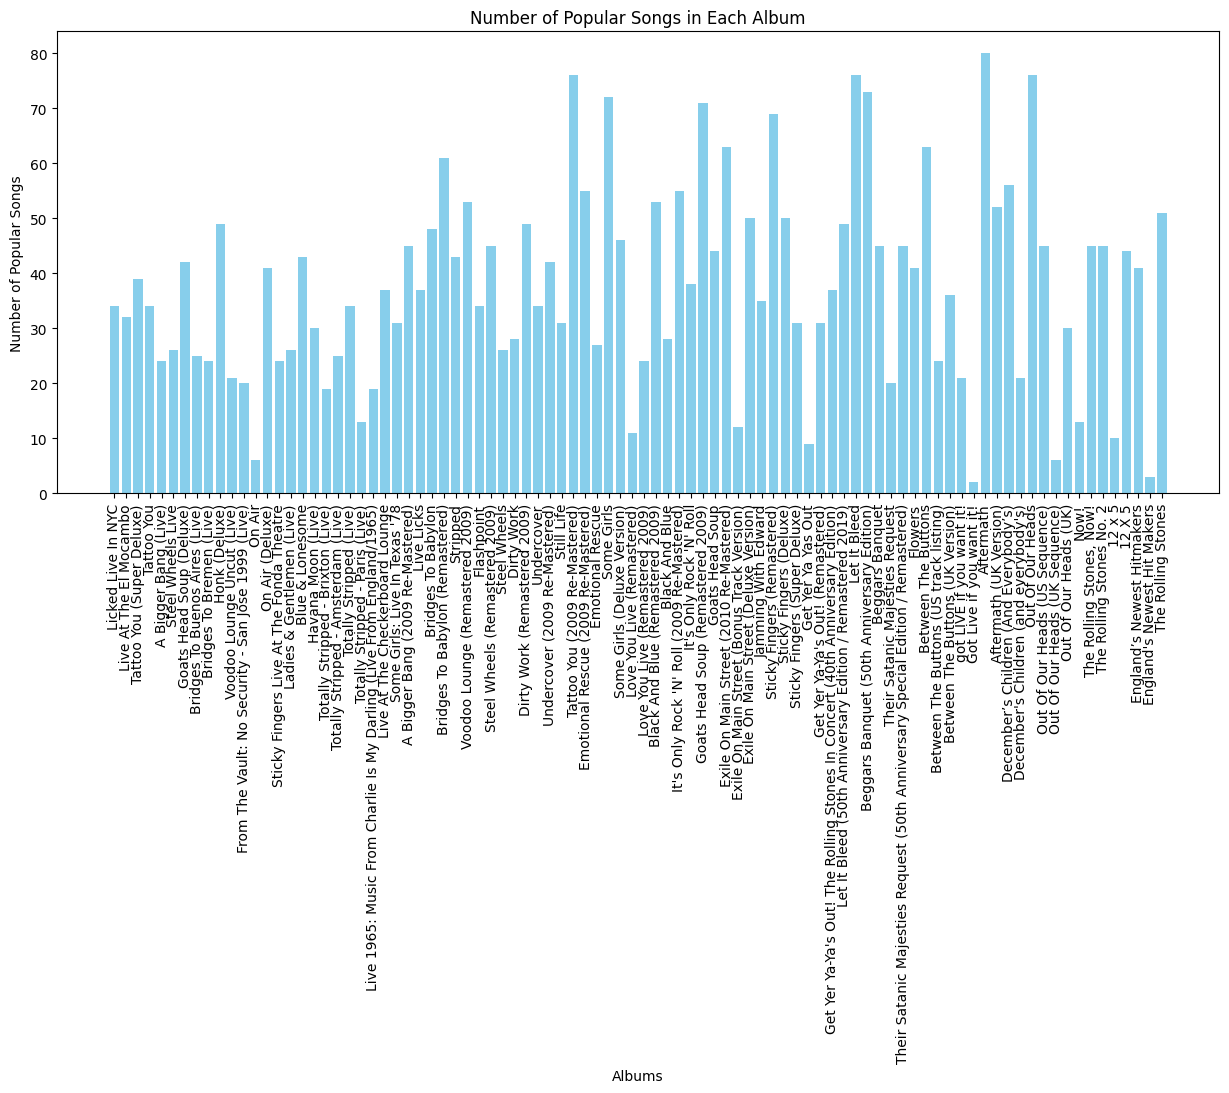

In [16]:

plt.figure(figsize=(15,6))
plt.bar(df['album'], df['popularity'], color='skyblue')
plt.xlabel('Albums')
plt.xticks(rotation=90)
plt.ylabel('Number of Popular Songs')
plt.title('Number of Popular Songs in Each Album')
plt.show()

**Correlation of Popularity with the other Features**

In [17]:
target_var = df1['popularity']

In [18]:
correlation = df1.corrwith(target_var)

In [19]:
correlation

acousticness        0.108046
danceability        0.141205
energy             -0.057272
instrumentalness   -0.010612
liveness           -0.205845
loudness            0.156323
speechiness        -0.136745
tempo              -0.061061
valence             0.065333
popularity          1.000000
duration_ms         0.074102
dtype: float64

###Performig EDA on the various Features.

In [20]:
df.head()

name               album release_date  track_number  \
0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10             1   
1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10             2   
2           Start Me Up - Live  Licked Live In NYC   2022-06-10             3   
3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10             4   
4            Don’t Stop - Live  Licked Live In NYC   2022-06-10             5   

                       id                                   uri  acousticness  \
0  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824   
1  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU        0.4370   
2  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW        0.4160   
3  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH        0.5670   
4  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw        0.4000   

   danceability  energy  instrumentalness  liveness  loudness  speechiness  \
0         0.463   0.993          0.996000     0.932   -12.913       0.1100   
1         0.326   0.965          0.233000     0.961    -4.803       0.0759   
2         0.386   0.969          0.400000     0.956    -4.936       0.1150   
3         0.369   0.985          0.000107     0.895    -5.535       0.1930   
4         0.303   0.969          0.055900     0.966    -5.098       0.0930   

     tempo  valence  popularity  duration_ms  
0  118.001   0.0302          33        48640  
1  131.455   0.3180          34       253173  
2  130.066   0.3130          34       263160  
3  132.994   0.1470          32       305880  
4  130.533   0.2060          32       305106

In [21]:
df2=df.copy()

In [22]:
df2['album'].mode()

0    Voodoo Lounge Uncut (Live)
Name: album, dtype: object

In [23]:
df2[df2['album']=='Voodoo Lounge Uncut (Live)']

name  \
280                    Whoopi Goldberg Intro - Live   
281                            Not Fade Away - Live   
282                            Tumbling Dice - Live   
283                       You Got Me Rocking - Live   
284                                Rocks Off - Live   
285                          Sparks Will Fly - Live   
286                             Live With Me - Live   
287            (I Can't Get No) Satisfaction - Live   
288                          Beast Of Burden - Live   
289                                    Angie - Live   
290                             Dead Flowers - Live   
291                           Sweet Virginia - Live   
292       Doo Doo Doo Doo Doo (Heartbreaker) - Live   
293                        It's All Over Now - Live   
294                 Stop Breakin' Down Blues - Live   
295                         Who Do You Love? - Live   
296                                I Go Wild - Live   
297                                 Miss You - Live   
298                         Honky Tonk Women - Live   
299                  Before They Make Me Run - Live   
300                                The Worst - Live   
301                   Sympathy For The Devil - Live   
302                               Monkey Man - Live   
303                      Street Fighting Man - Live   
304                              Start Me Up - Live   
305  It's Only Rock 'N' Roll (But I Like It) - Live   
306                              Brown Sugar - Live   
307                       Jumpin’ Jack Flash - Live   
308                    Whoopi Goldberg Intro - Live   
309                            Not Fade Away - Live   
310                            Tumbling Dice - Live   
311                       You Got Me Rocking - Live   
312                                Rocks Off - Live   
313                          Sparks Will Fly - Live   
314                             Live With Me - Live   
315            (I Can't Get No) Satisfaction - Live   
316                          Beast Of Burden - Live   
317                                    Angie - Live   
318                             Dead Flowers - Live   
319                           Sweet Virginia - Live   
320       Doo Doo Doo Doo Doo (Heartbreaker) - Live   
321                        It's All Over Now - Live   
322                 Stop Breakin' Down Blues - Live   
323                         Who Do You Love? - Live   
324                                I Go Wild - Live   
325                                 Miss You - Live   
326                         Honky Tonk Women - Live   
327                  Before They Make Me Run - Live   
328                                The Worst - Live   
329                   Sympathy For The Devil - Live   
330                               Monkey Man - Live   
331                      Street Fighting Man - Live   
332                              Start Me Up - Live   
333  It's Only Rock 'N' Roll (But I Like It) - Live   
334                              Brown Sugar - Live   
335                       Jumpin’ Jack Flash - Live   

                          album release_date  track_number  \
280  Voodoo Lounge Uncut (Live)   2018-11-16             1   
281  Voodoo Lounge Uncut (Live)   2018-11-16             2   
282  Voodoo Lounge Uncut (Live)   2018-11-16             3   
283  Voodoo Lounge Uncut (Live)   2018-11-16             4   
284  Voodoo Lounge Uncut (Live)   2018-11-16             5   
285  Voodoo Lounge Uncut (Live)   2018-11-16             6   
286  Voodoo Lounge Uncut (Live)   2018-11-16             7   
287  Voodoo Lounge Uncut (Live)   2018-11-16             8   
288  Voodoo Lounge Uncut (Live)   2018-11-16             9   
289  Voodoo Lounge Uncut (Live)   2018-11-16            10   
290  Voodoo Lounge Uncut (Live)   2018-11-16            11   
291  Voodoo Lounge Uncut (Live)   2018-11-16            12   
292  Voodoo Lounge Uncut (Live)   2018-11-16            13   
293  Voodoo Lounge Uncut (Live)   2018-11-1

In [24]:
df2['Month'] = df2['release_date'].dt.month
df2['Year'] = df2['release_date'].dt.year
df2['Day'] = df2['release_date'].dt.day
df2['Month name'] = df2['release_date'].dt.month_name()
df2['Day_Name'] = df2['release_date'].dt.day_name()

In [25]:
df2.head()

name               album release_date  track_number  \
0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10             1   
1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10             2   
2           Start Me Up - Live  Licked Live In NYC   2022-06-10             3   
3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10             4   
4            Don’t Stop - Live  Licked Live In NYC   2022-06-10             5   

                       id                                   uri  acousticness  \
0  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824   
1  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU        0.4370   
2  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW        0.4160   
3  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH        0.5670   
4  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw        0.4000   

   danceability  energy  instrumentalness  ...  speechiness    tempo  valence  \
0         0.463   0.993          0.996000  ...       0.1100  118.001   0.0302   
1         0.326   0.965          0.233000  ...       0.0759  131.455   0.3180   
2         0.386   0.969          0.400000  ...       0.1150  130.066   0.3130   
3         0.369   0.985          0.000107  ...       0.1930  132.994   0.1470   
4         0.303   0.969          0.055900  ...       0.0930  130.533   0.2060   

   popularity  duration_ms  Month  Year  Day  Month name  Day_Name  
0          33        48640      6  2022   10        June    Friday  
1          34       253173      6  2022   10        June    Friday  
2          34       263160      6  2022   10        June    Friday  
3          32       305880      6  2022   10        June    Friday  
4          32       305106      6  2022   10        June    Friday  

[5 rows x 22 columns]

In [26]:
pd.DataFrame(df.groupby([df2['Year'],df2['Month name']])['album'].value_counts())

count
Year Month name album                             
1964 April      The Rolling Stones              12
     May        England’s Newest Hitmakers      12
                England's Newest Hit Makers     12
     October    12 X 5                          12
                12 x 5                          12
...                                            ...
2021 July       A Bigger Bang (Live)            22
     October    Tattoo You (Super Deluxe)       46
                Tattoo You                      11
2022 June       Licked Live In NYC              23
     May        Live At The El Mocambo          23

[91 rows x 1 columns]

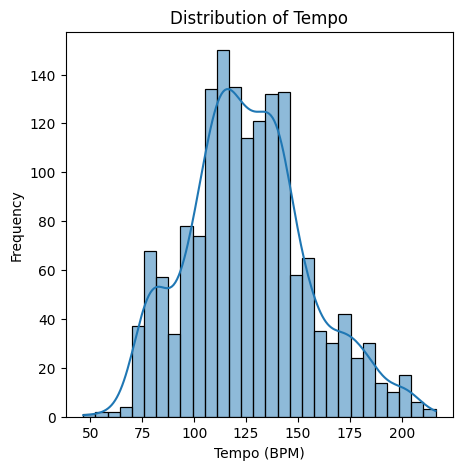

In [27]:
# Histogram for tempo
plt.figure(figsize=(5,5))
sns.histplot(df2['tempo'], kde=True)
plt.title('Distribution of Tempo')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Frequency')
plt.show()

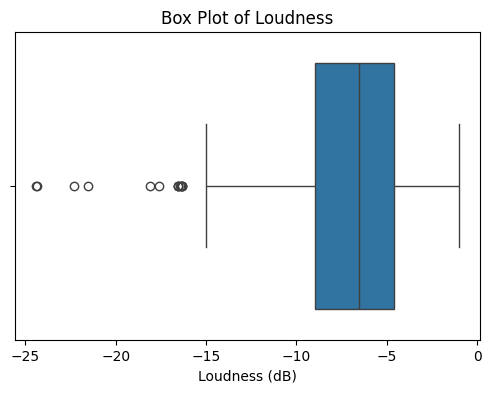

In [28]:
#BoxPlot for loudness.
plt.figure(figsize=(6, 4))
sns.boxplot(x=df2['loudness'])
plt.title('Box Plot of Loudness')
plt.xlabel('Loudness (dB)')
plt.show()


In [29]:
#Finding the relationship between the different feature.

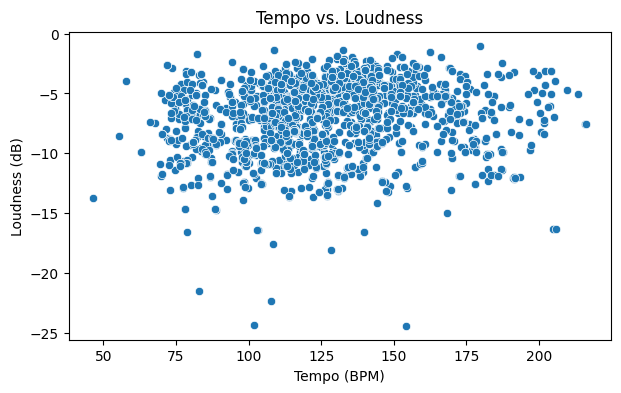

In [30]:
# Scatter plot: tempo vs. loudness
plt.figure(figsize=(7,4))
sns.scatterplot(x='tempo', y='loudness', data=df2)
plt.title('Tempo vs. Loudness')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Loudness (dB)')
plt.show()

Plot Between Various Features.

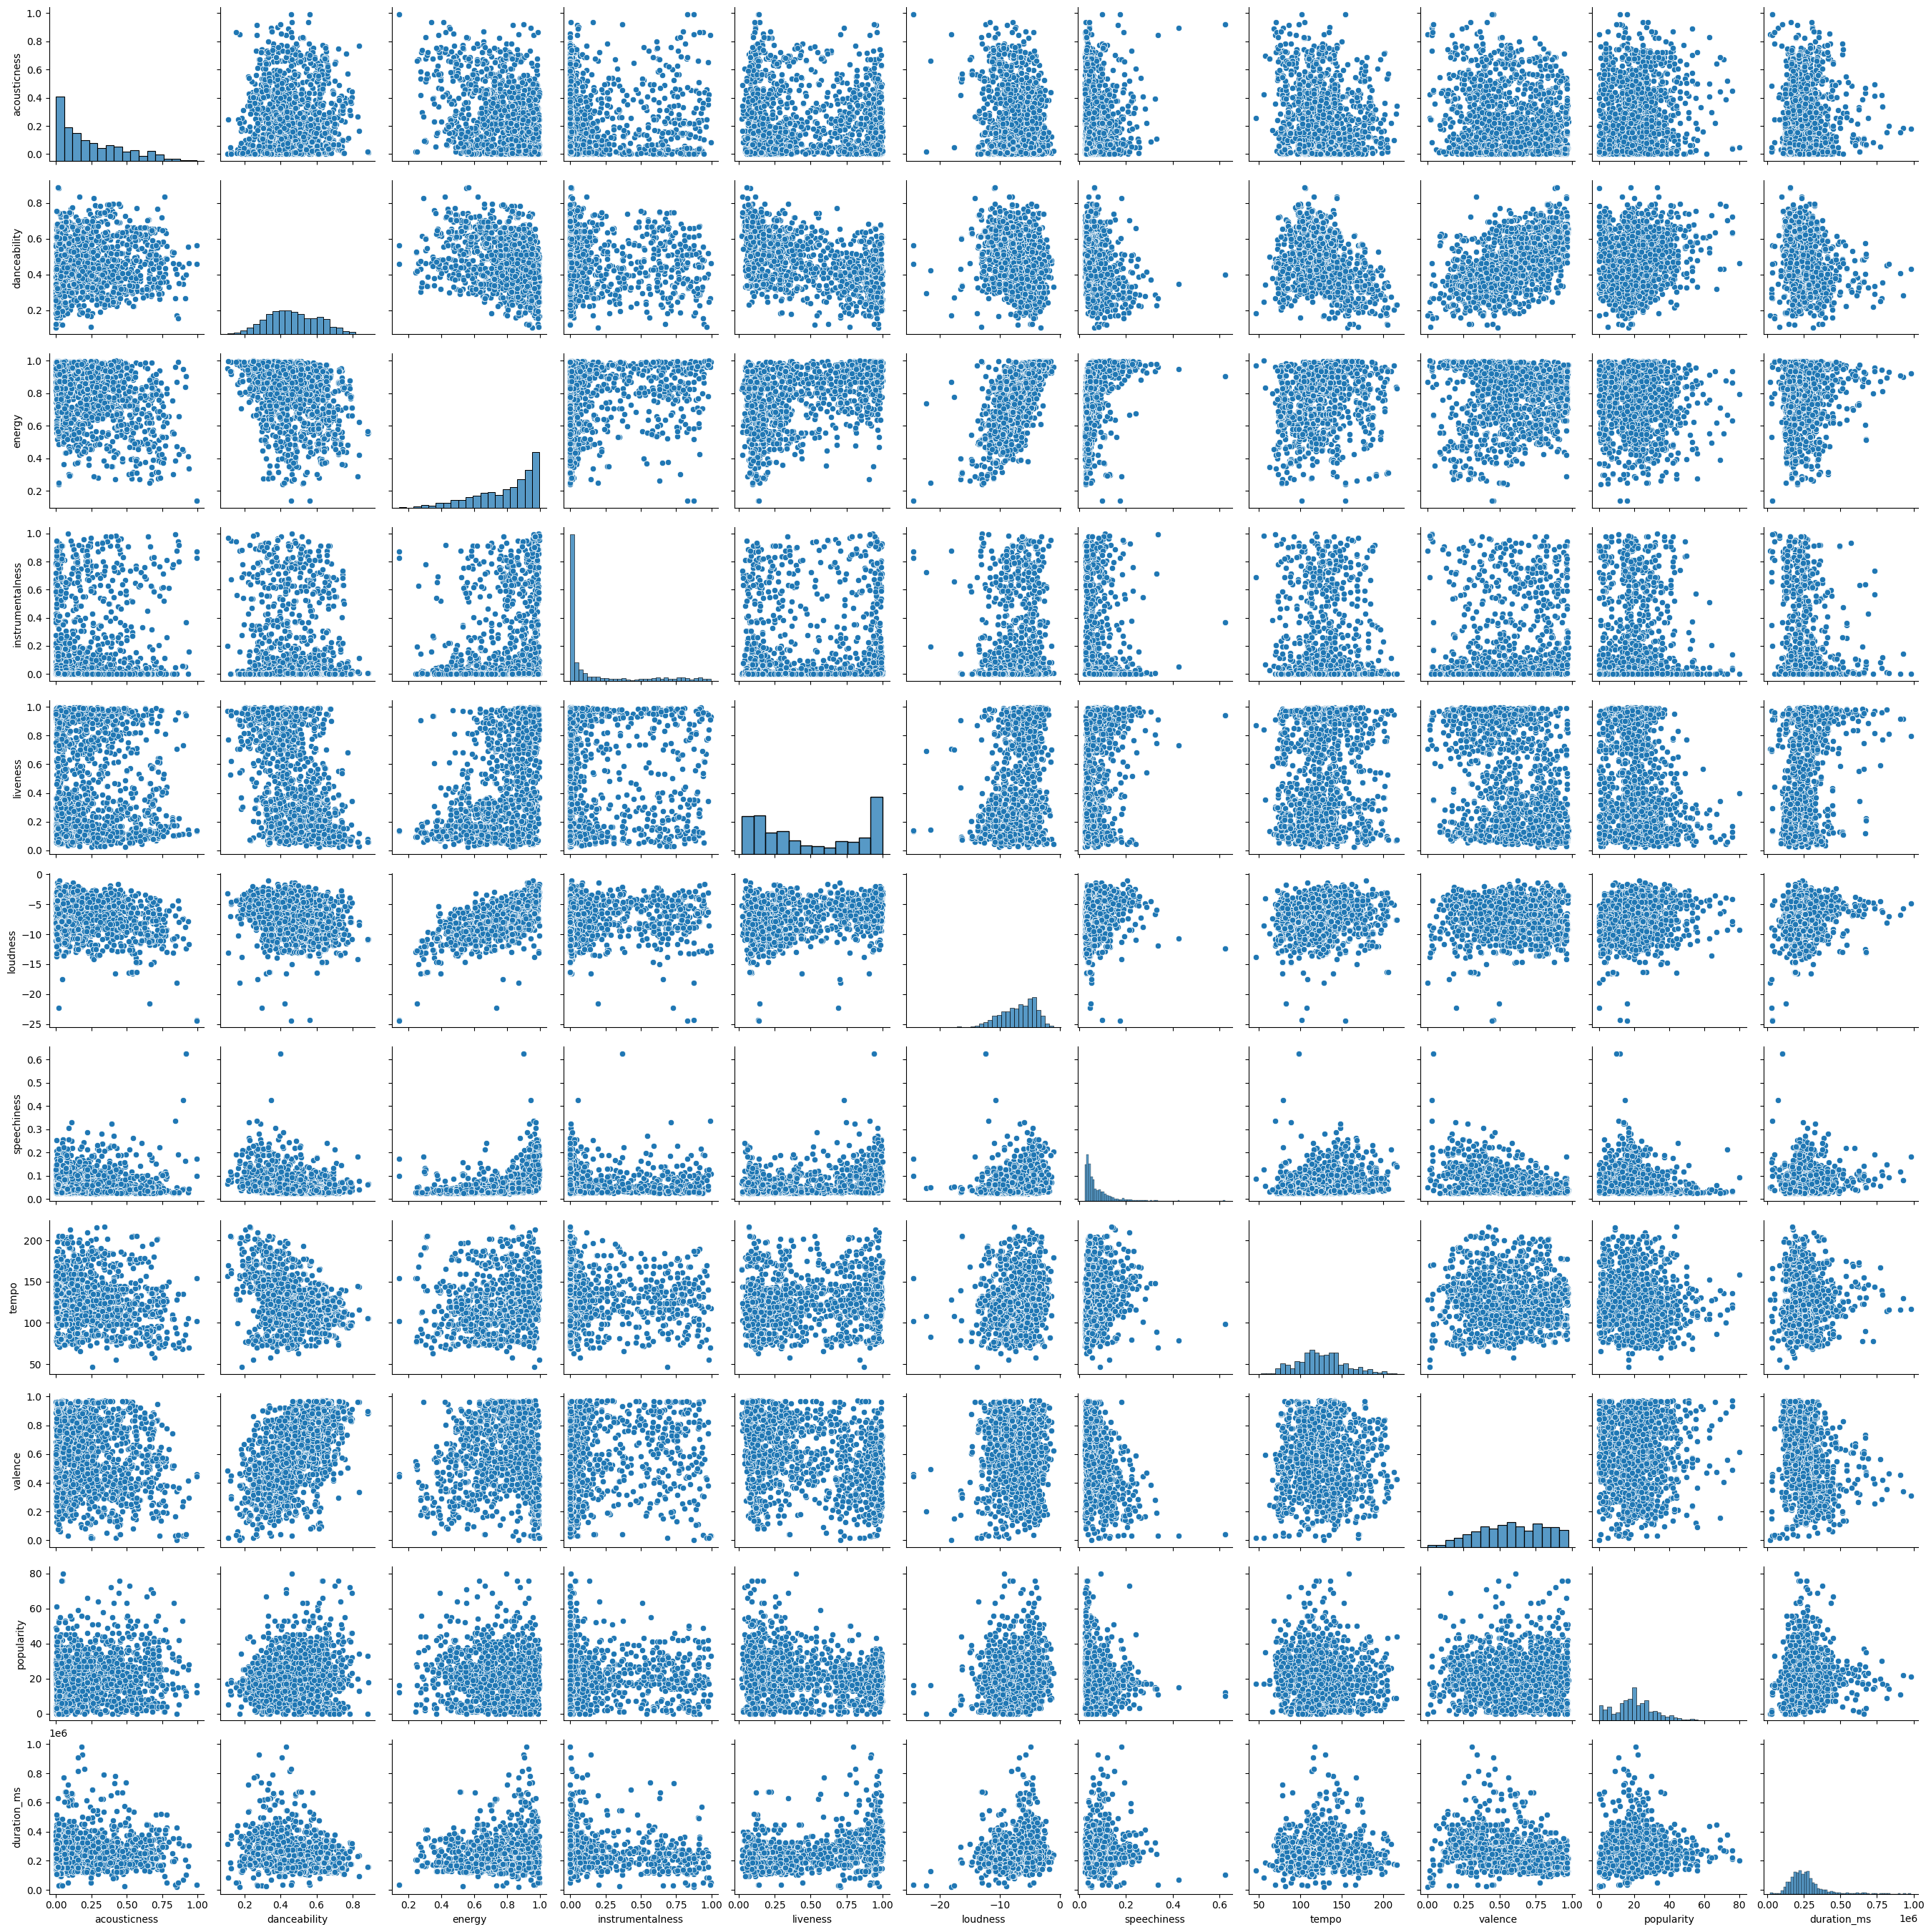

In [31]:
# Pair plot
sns.pairplot(df2[['acousticness','danceability'	,'energy'	,'instrumentalness'	,'liveness',	'loudness'	,'speechiness',	'tempo'	,'valence','popularity','duration_ms']])
plt.show()

In [32]:
#Correlation Analysis.

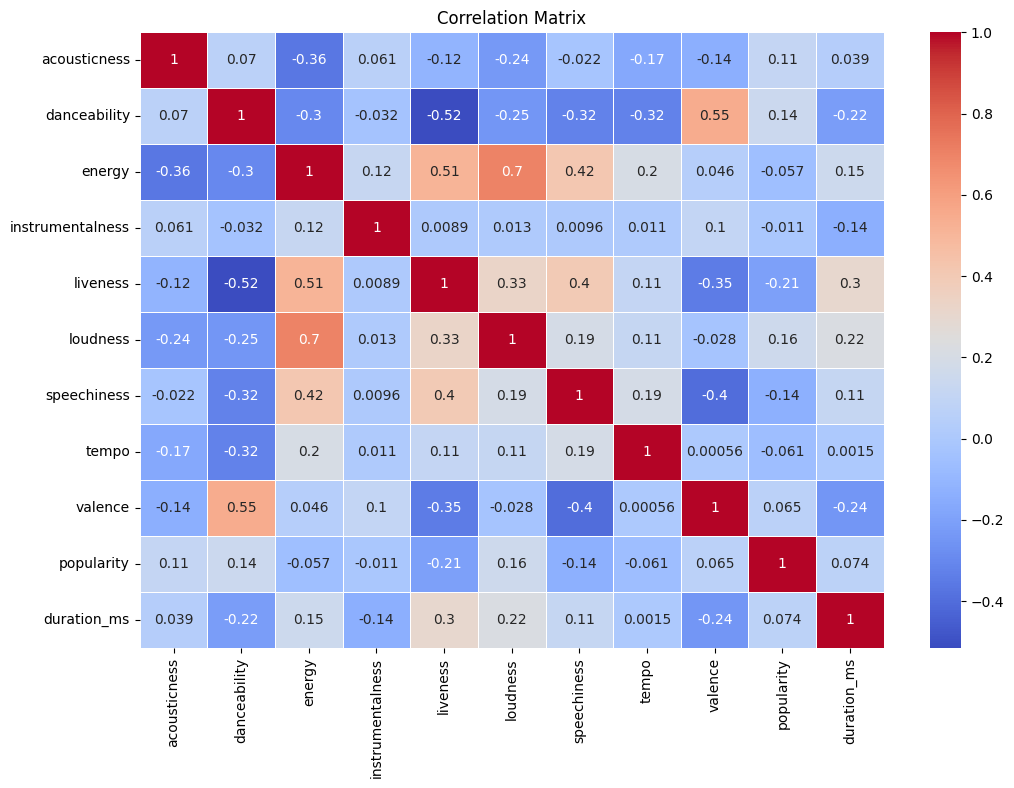

In [33]:
# Correlation matrix
corr_matrix = df1.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

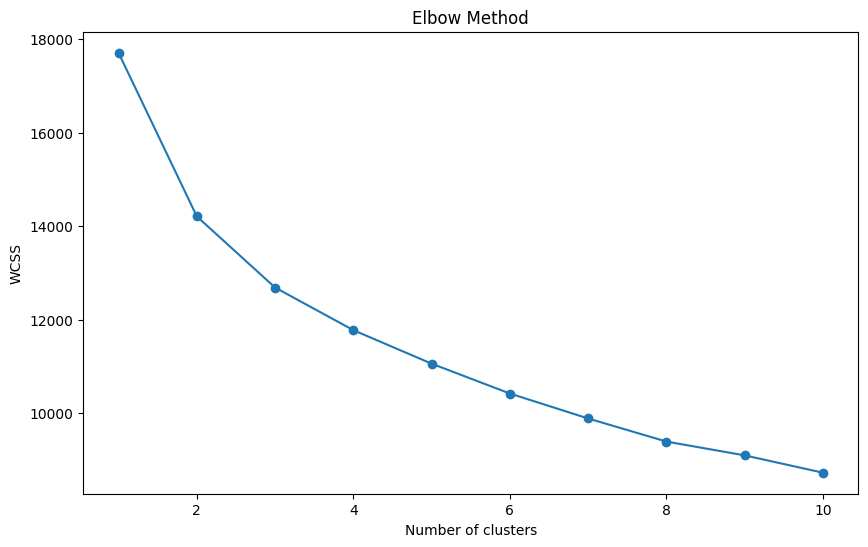

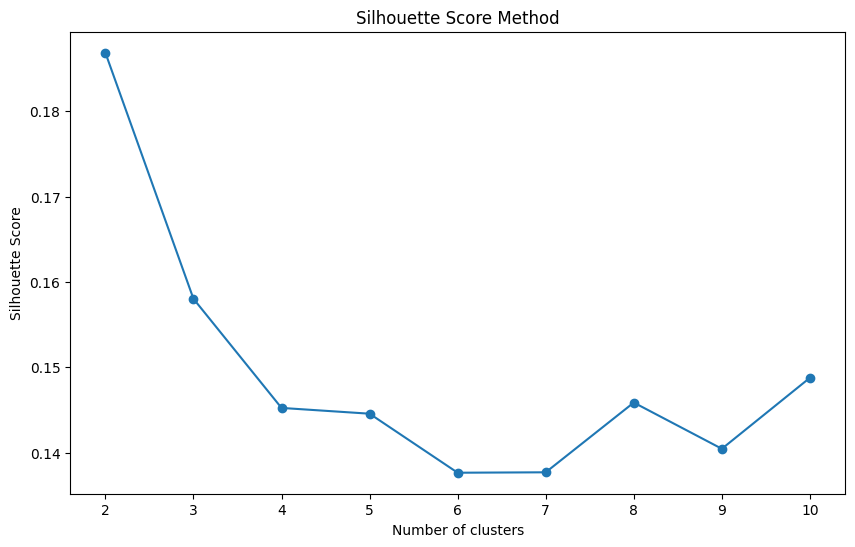

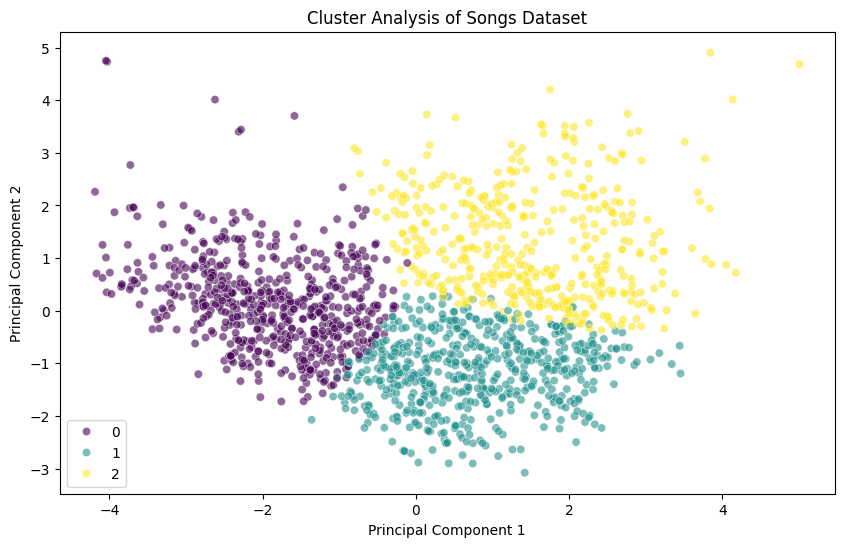

   acousticness  danceability    energy  instrumentalness  liveness  loudness  \
0      0.188823      0.360651  0.922875          0.149099  0.833054 -5.421080   
1      0.181254      0.554936  0.830561          0.236991  0.309185 -6.411034   
2      0.422285      0.498795  0.570381          0.088736  0.280882 -9.748101   

   speechiness       tempo   valence  popularity    duration_ms  
0     0.106647  137.441756  0.447464   17.449573  305277.851282  
1     0.049944  122.617153  0.780554   23.710843  223545.363167  
2     0.046191  115.648829  0.500041   21.362613  239838.619369  
Cluster
0    585
1    581
2    444
Name: count, dtype: int64


In [34]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Select numerical features for clustering
numerical_features = df1.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Perform PCA to reduce dimensions to 2 for visualization purposes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the principal components to the original dataframe
df_pca = pd.concat([df, pca_df], axis=1)

# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette score for the optimal number of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Optimal number of clusters (example: 3)
optimal_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Add cluster labels to the PCA DataFrame for visualization
df_pca['Cluster'] = kmeans.fit_predict(scaled_features)

# Scatter plot of the principal components with cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Cluster Analysis of Songs Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.show()

# Cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=numerical_features.columns)
print(cluster_centers_df)

# Cluster distribution
print(df['Cluster'].value_counts())

In [37]:
#interpretation
# Define each cluster based on the features
print("Cluster Definitions:")
for i in range(optimal_clusters):
    print(f"\nCluster {i} characteristics:")
    print(cluster_centers_df.iloc[i])

Cluster Definitions:

Cluster 0 characteristics:
acousticness             0.188823
danceability             0.360651
energy                   0.922875
instrumentalness         0.149099
liveness                 0.833054
loudness                -5.421080
speechiness              0.106647
tempo                  137.441756
valence                  0.447464
popularity              17.449573
duration_ms         305277.851282
Name: 0, dtype: float64

Cluster 1 characteristics:
acousticness             0.181254
danceability             0.554936
energy                   0.830561
instrumentalness         0.236991
liveness                 0.309185
loudness                -6.411034
speechiness              0.049944
tempo                  122.617153
valence                  0.780554
popularity              23.710843
duration_ms         223545.363167
Name: 1, dtype: float64

Cluster 2 characteristics:
acousticness             0.422285
danceability             0.498795
energy                   0.5703